# LSTM
Based off the Kaggle notebook https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm

Answering:
1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks'?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

In [2]:
import yfinance as yf

stock_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
data = yf.download(stock_list, start="2018-01-01", end="2023-01-1")
print('data fields downloaded:', set(data.columns.get_level_values(0)))
data.head()

[*********************100%%**********************]  4 of 4 completed
data fields downloaded: {'Close', 'Volume', 'Open', 'Low', 'High', 'Adj Close'}


Adj Close                                       Close             \
                 AAPL       AMZN       GOOG       MSFT       AAPL       AMZN   
Date                                                                           
2018-01-02  40.722878  59.450500  53.250000  80.228996  43.064999  59.450500   
2018-01-03  40.715778  60.209999  54.124001  80.602371  43.057499  60.209999   
2018-01-04  40.904903  60.479500  54.320000  81.311790  43.257500  60.479500   
2018-01-05  41.370625  61.457001  55.111500  82.319908  43.750000  61.457001   
2018-01-08  41.216965  62.343498  55.347000  82.403931  43.587502  62.343498   

                                       High             ...        Low  \
                 GOOG       MSFT       AAPL       AMZN  ...       GOOG   
Date                                                    ...              
2018-01-02  53.250000  85.949997  43.075001  59.500000  ...  52.261501   
2018-01-03  54.124001  86.349998  43.637501  60.274502  ...  53.160500   
2018-01-04  54.320000  87.110001  43.367500  60.793499  ...  54.200100   
2018-01-05  55.111500  88.190002  43.842499  61.457001  ...  54.599998   
2018-01-08  55.347000  88.279999  43.902500  62.653999  ...  55.081001   

                            Open                                      Volume  \
                 MSFT       AAPL       AMZN       GOOG       MSFT       AAPL   
Date                                                                           
2018-01-02  85.500000  42.540001  58.599998  52.417000  86.129997  102223600   
2018-01-03  85.970001  43.132500  59.415001  53.215500  86.059998  118071600   
2018-01-04  86.570000  43.134998  60.250000  54.400002  86.589996   89738400   
2018-01-05  87.430000  43.360001  60.875500  54.700001  87.660004   94640000   
2018-01-08  87.599998  43.587502  61.799999  55.111500  88.199997   82271200   

                                          
                AMZN      GOOG      MSFT  
Date                                      
2018-01-02  53890000  24752000  22483800  
2018-01-03  62176000  28604000  26061400  
2018-01-04  60442000  20092000  21912000  
2018-01-05  70894000  25582000  23407100  
2018-01-08  85590000  20952000  22113000  

[5 rows x 24 columns]

In [3]:
data.loc()

In [4]:
AAPL = data.xs('AAPL', level=1, axis=1)
GOOG = data.xs('GOOG', level=1, axis=1)
MSFT = data.xs('MSFT', level=1, axis=1)
AMZN = data.xs('AMZN', level=1, axis=1)

company_list = [AAPL, GOOG, MSFT, AMZN]

In [5]:
AAPL.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,96.277481,98.092897,99.217804,96.881497,98.028503,1.168806e+08
std,46.416159,46.309891,46.894754,45.688159,46.302471,5.504461e+07
min,34.118874,35.547501,36.430000,35.500000,35.994999,3.519590e+07
25%,49.233084,51.022501,51.448750,50.573750,50.956249,8.014245e+07
50%,89.725418,91.632500,92.970001,90.910004,91.279999,1.023002e+08
75%,141.376862,142.864998,144.474998,141.004997,142.760002,1.372052e+08
max,179.953888,182.009995,182.940002,179.119995,182.630005,4.265100e+08


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1259 non-null   float64
 1   Close      1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Open       1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


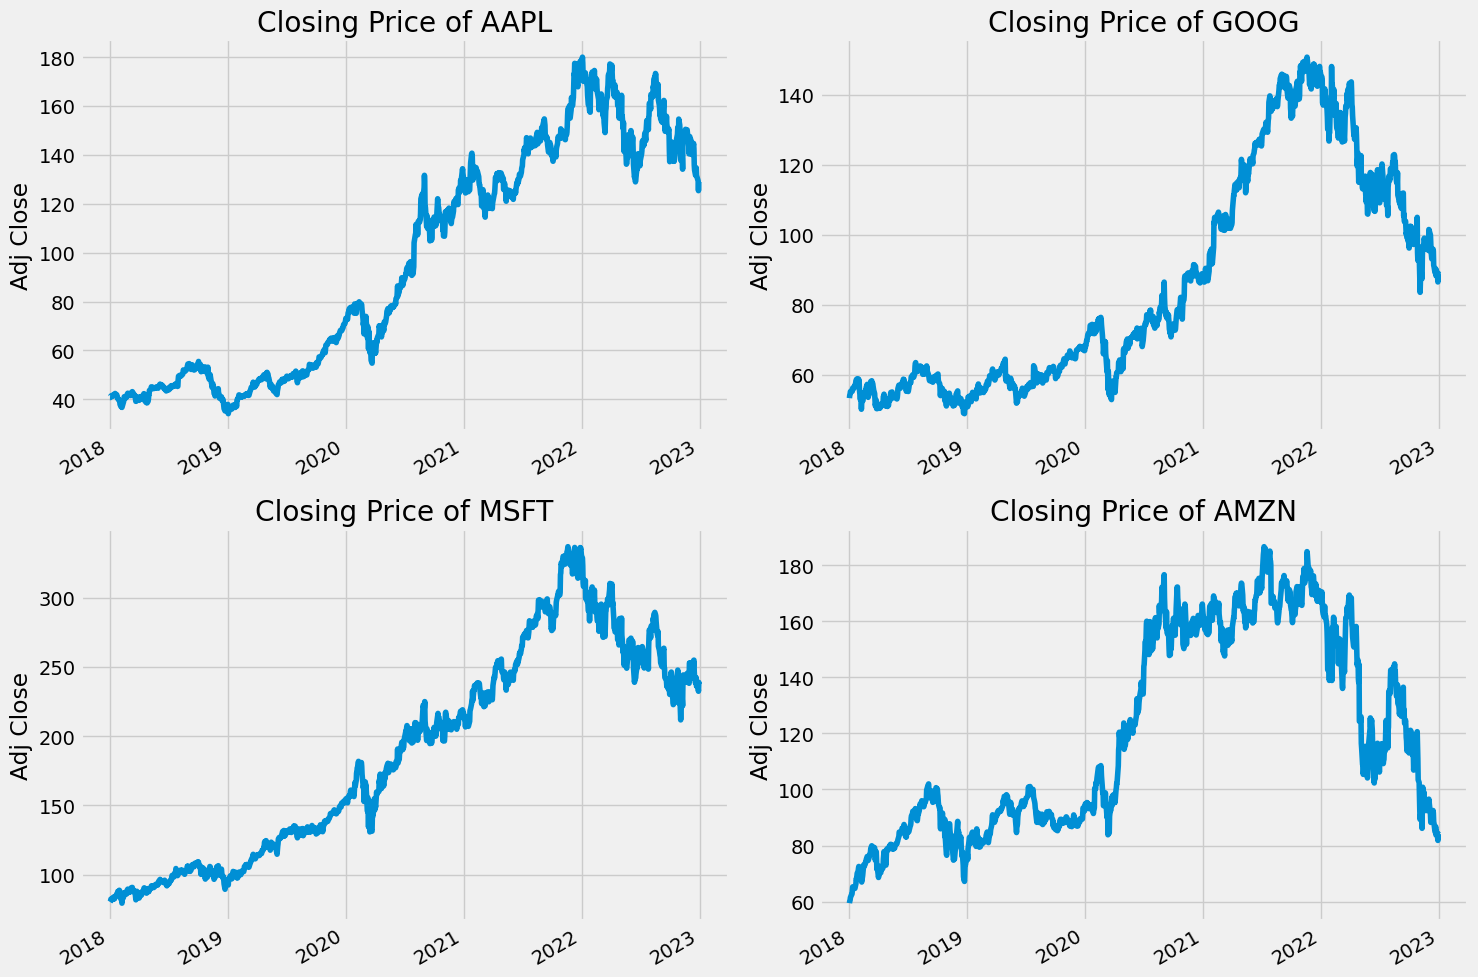

In [7]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list):
    plt.subplot(2, 2, i+1)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock_list[i]}")
    
plt.tight_layout()


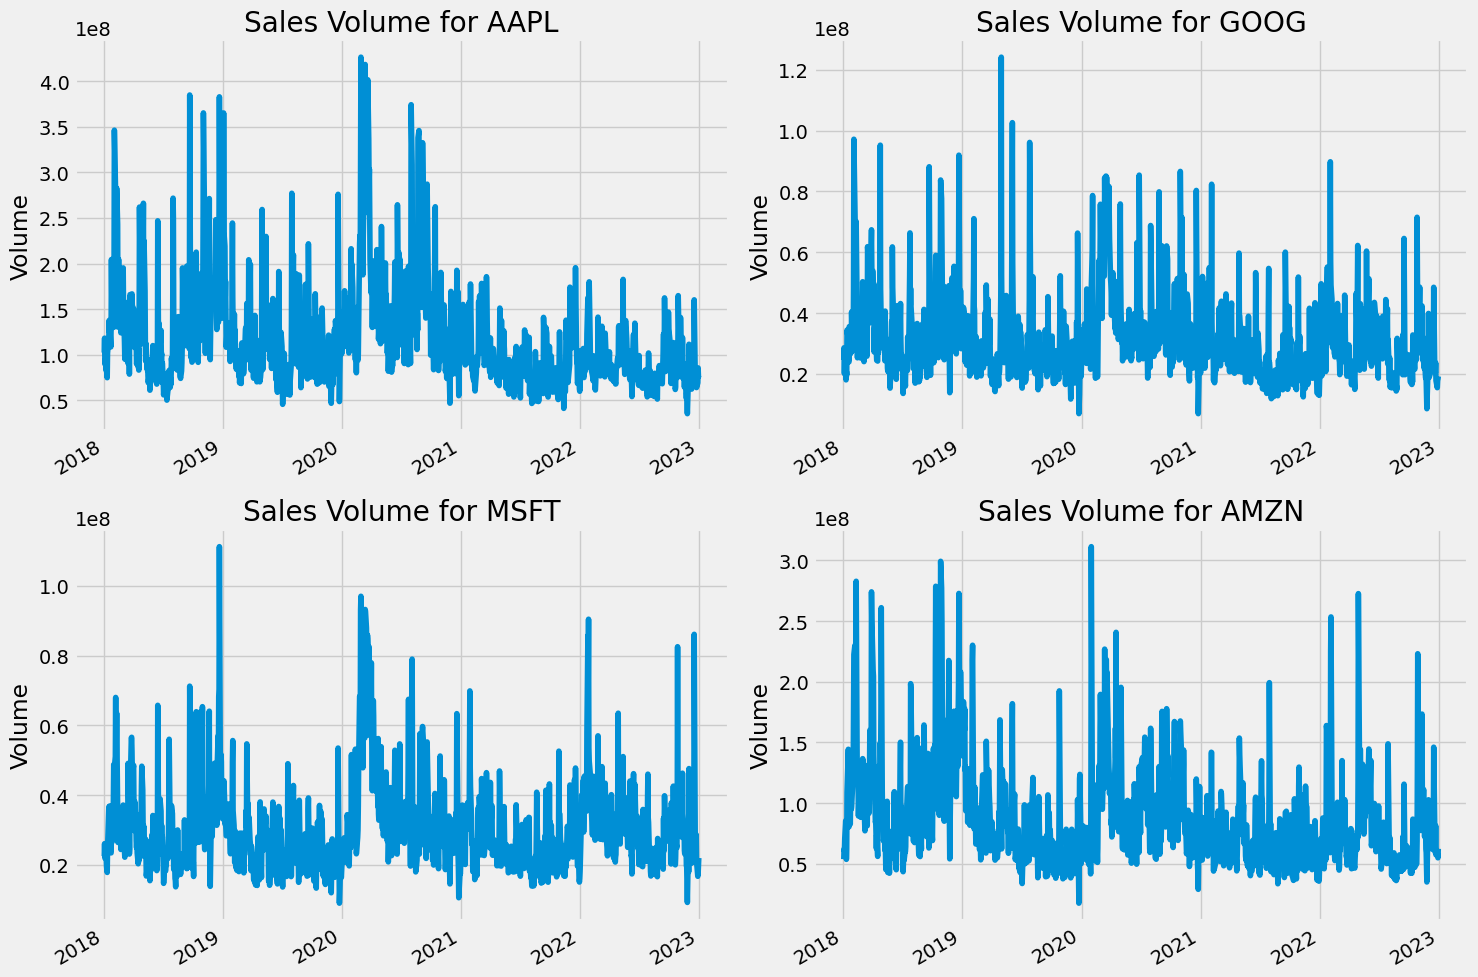

In [8]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stock_list[i - 1]}")
    
plt.tight_layout()

MA is a simple technical analysis tool. Smooths out volatility.

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_74390/2620952860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company[column_name] = company['Adj Close'].rolling(ma).mean()
/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_74390/2620952860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company[column_name] = company['Adj Close'].rolling(ma).mean()
/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_74390/2620952860.py:6: SettingWithCopyWarning: 
A value is trying to be

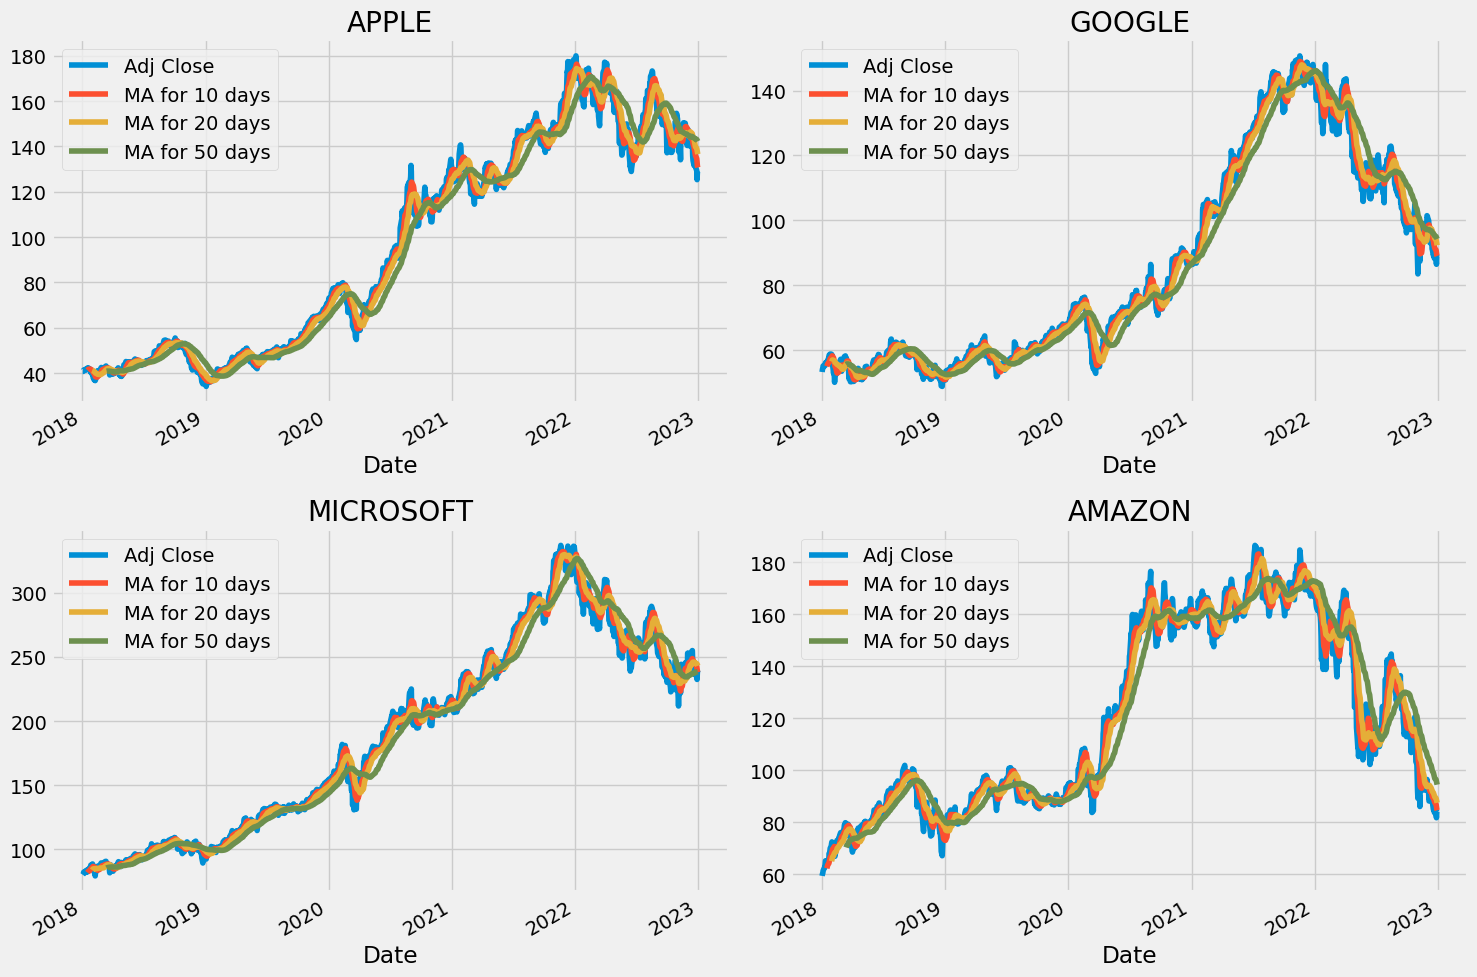

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

Daily returns! Now we're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_74390/3236142522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Daily Return'] = company['Adj Close'].pct_change()
/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_74390/3236142522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Daily Return'] = company['Adj Close'].pct_change()
/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_74390/3236142522.py:3: SettingWithCopyWarning: 
A value is trying to be set o

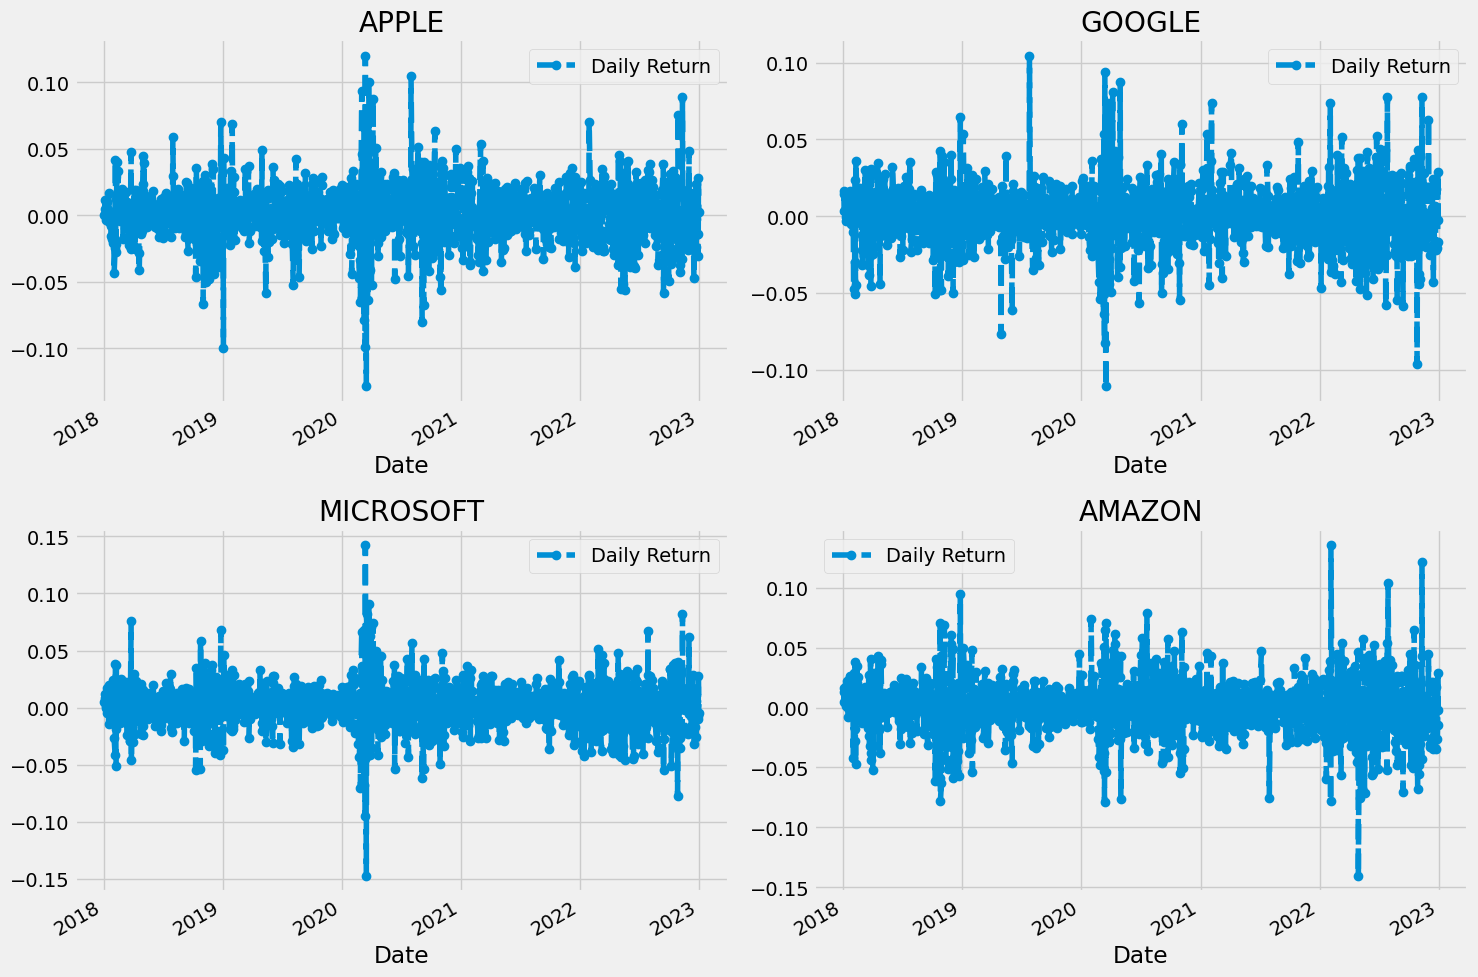

In [10]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure

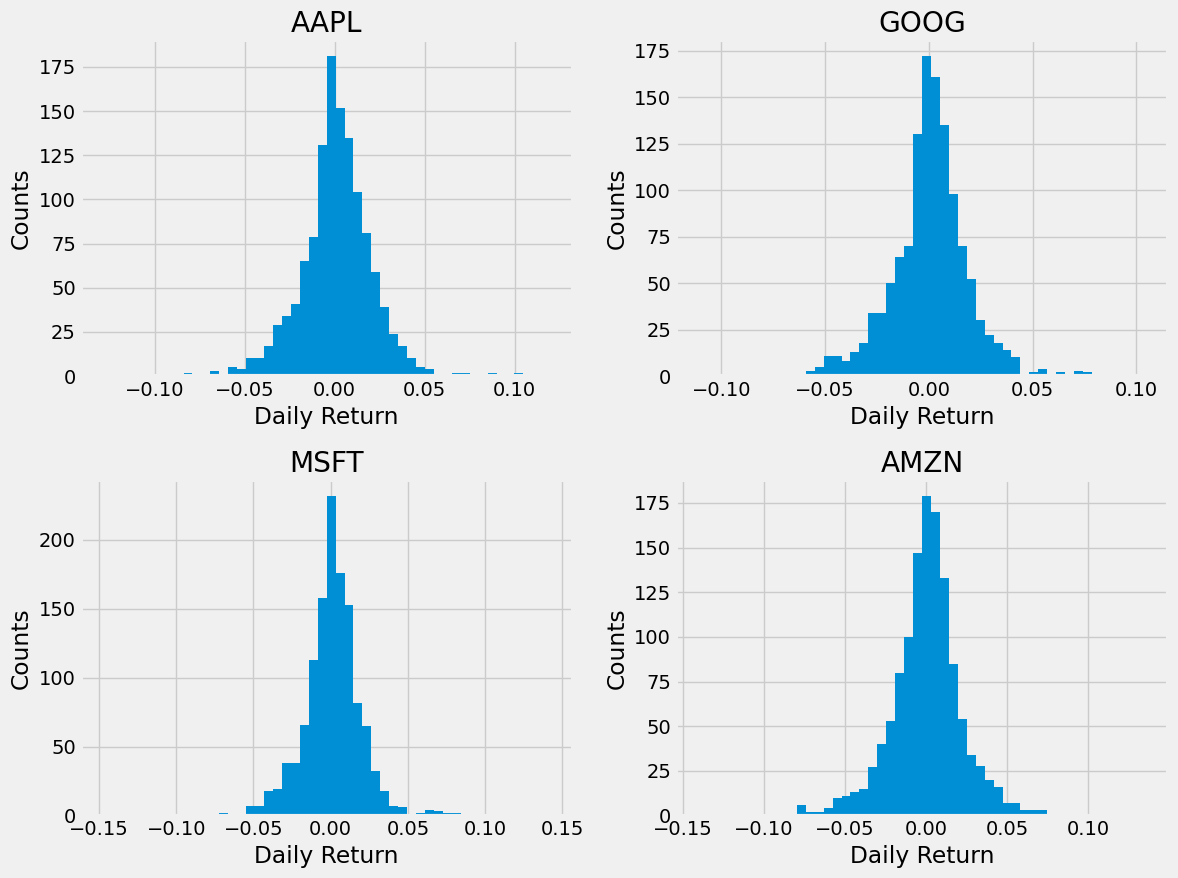

In [11]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list):
    plt.subplot(2, 2, i+1)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Counts')
    plt.xlabel("Daily Return")
    plt.title(f"{stock_list[i]}")
    
plt.tight_layout()

Now let's look at correlation between diff stock close prices.

In [12]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = data["Adj Close"]

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.012775,0.016413,0.004654
2018-01-04,0.004645,0.004476,0.003621,0.008801
2018-01-05,0.011385,0.016163,0.014571,0.012398
2018-01-08,-0.003714,0.014425,0.004273,0.001021


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

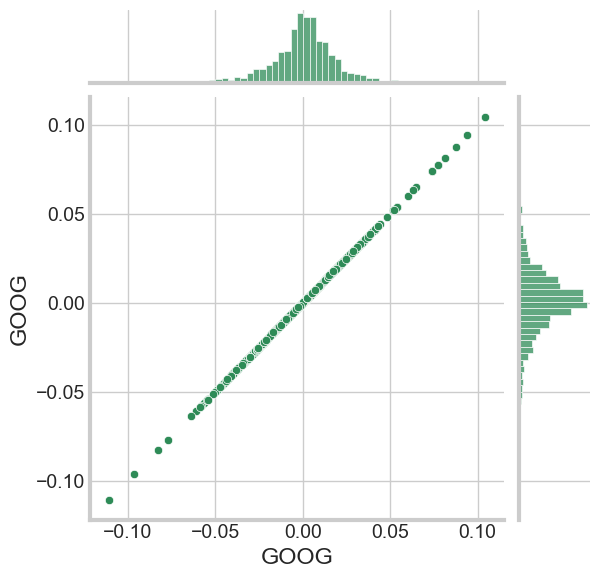

In [13]:
import seaborn as sns
sns.set_style('whitegrid')

# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

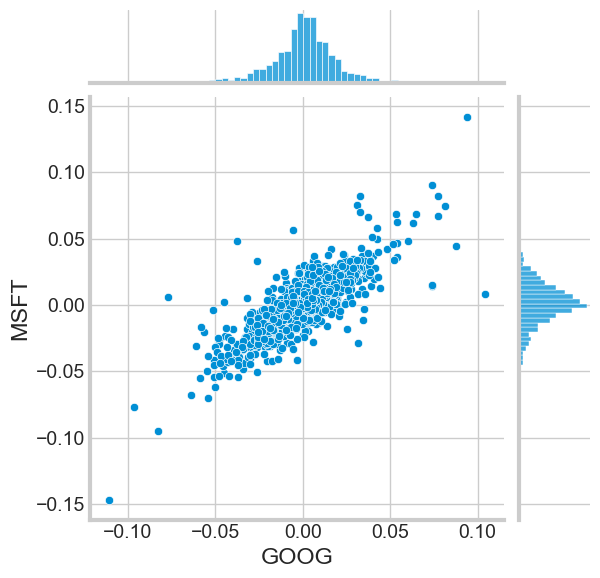

In [14]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

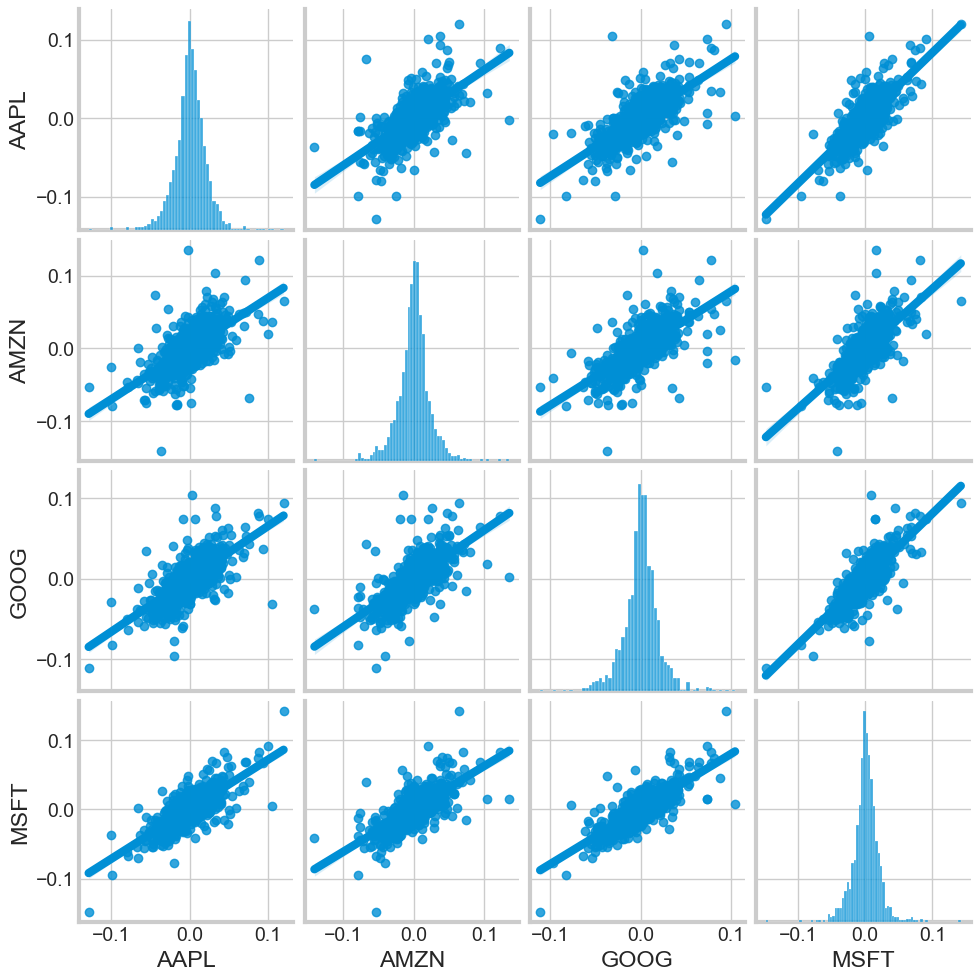

In [15]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. 

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

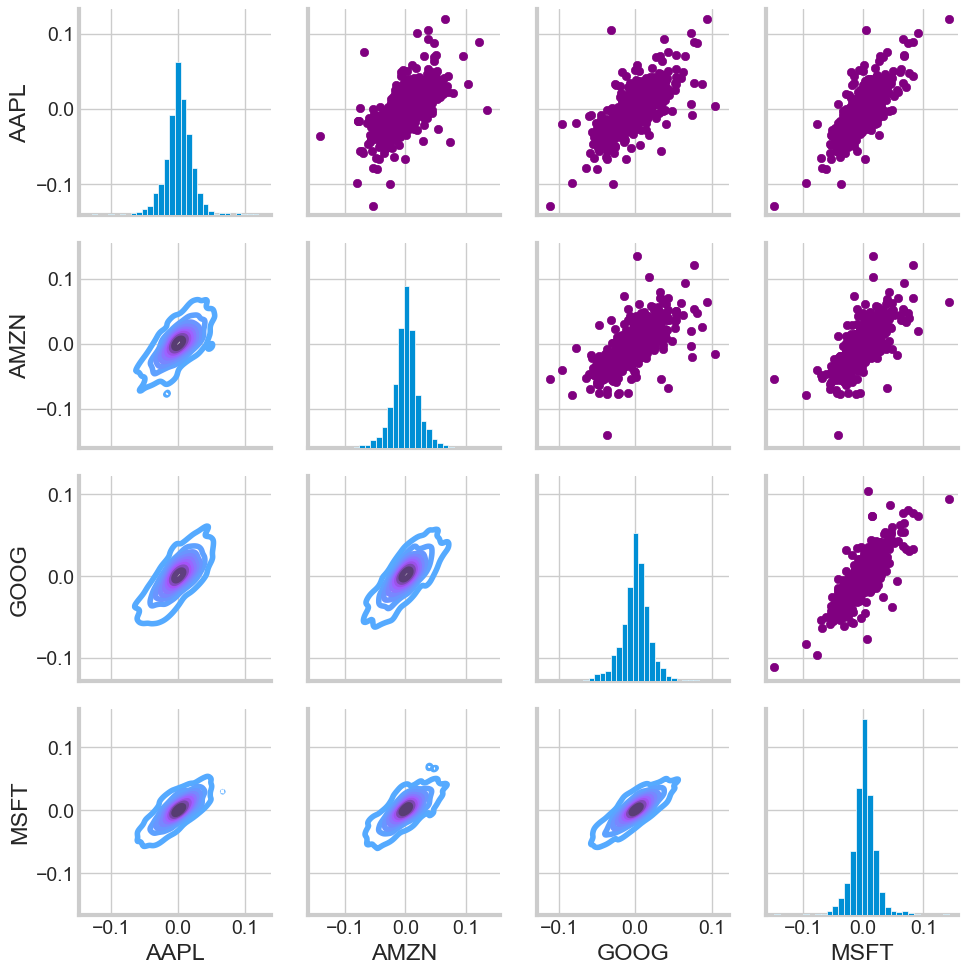

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

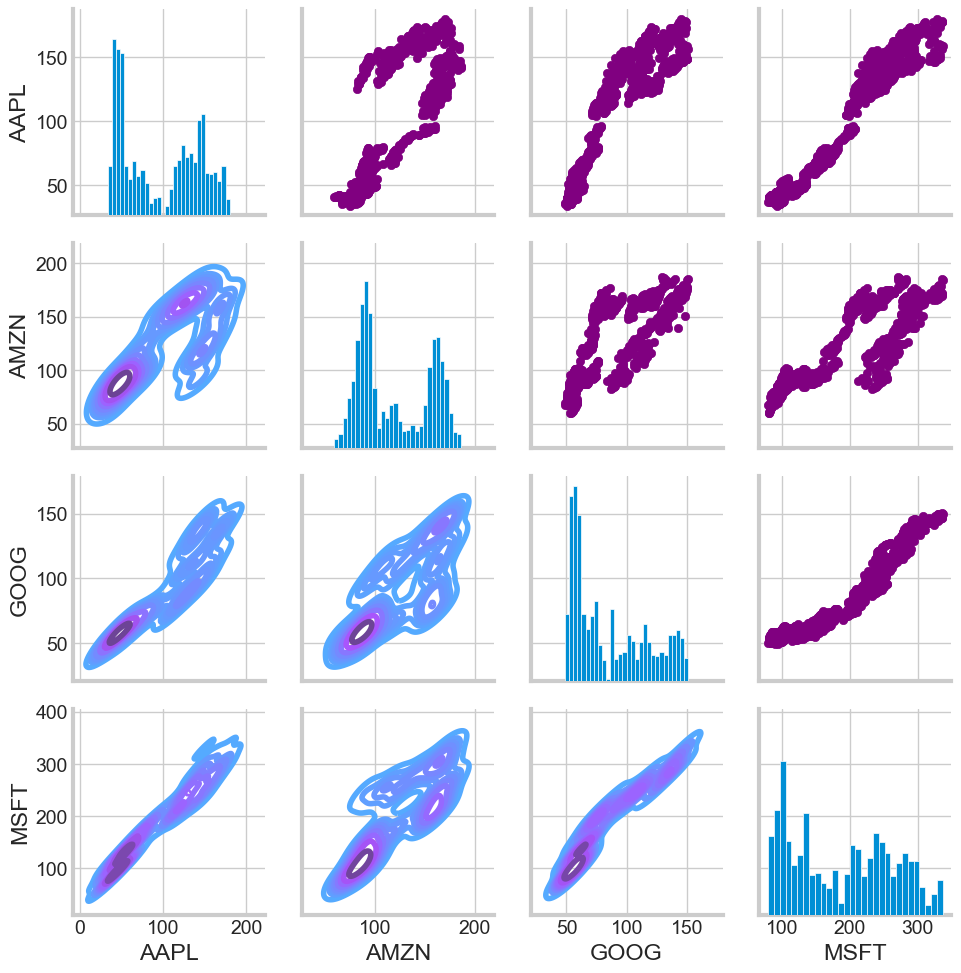

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

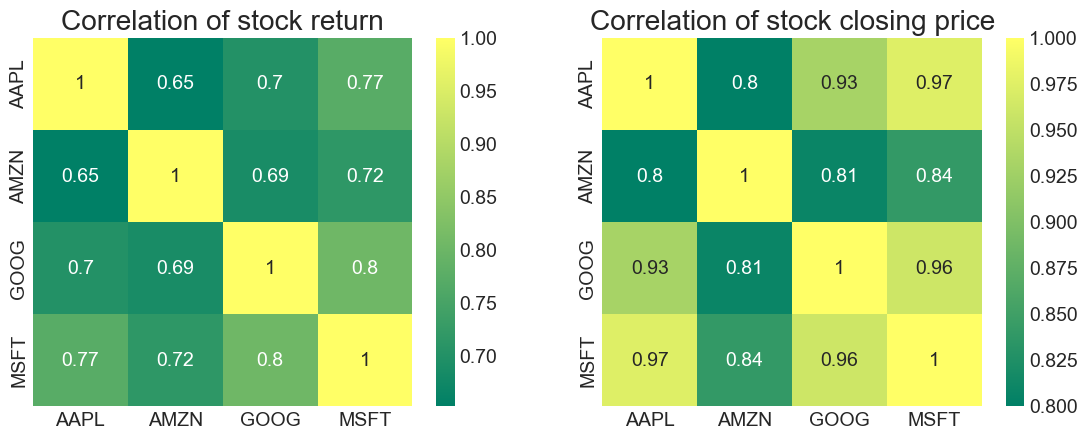

In [18]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

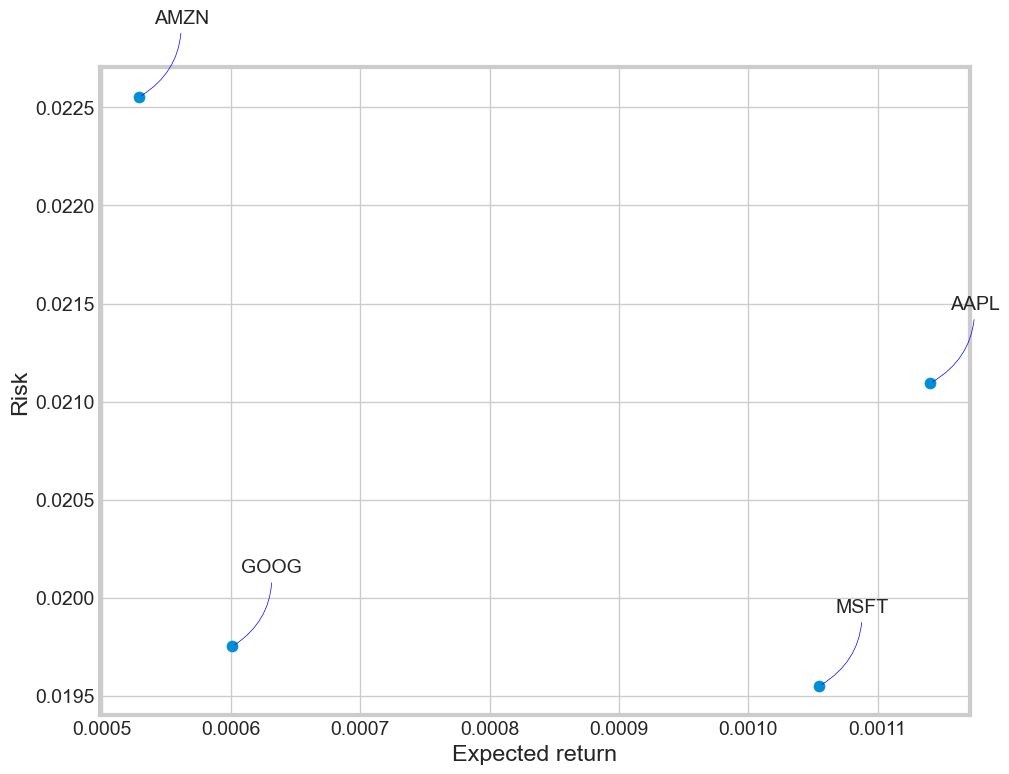

In [19]:
import numpy as np

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Predicting close price of AAPL...

In [94]:
from datetime import datetime
# Get the stock quote
df = AAPL
# Show teh data
df.head()

,Adj Close,Close,High,Low,Open,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2018-01-02,40.722878,43.064999,43.075001,42.314999,42.540001,102223600,NaN,NaN,NaN,NaN
2018-01-03,40.715778,43.057499,43.637501,42.990002,43.132500,118071600,NaN,NaN,NaN,-0.000174
2018-01-04,40.904903,43.257500,43.367500,43.020000,43.134998,89738400,NaN,NaN,NaN,0.004645
2018-01-05,41.370625,43.750000,43.842499,43.262501,43.360001,94640000,NaN,NaN,NaN,0.011385
2018-01-08,41.216965,43.587502,43.902500,43.482498,43.587502,82271200,NaN,NaN,NaN,-0.003714


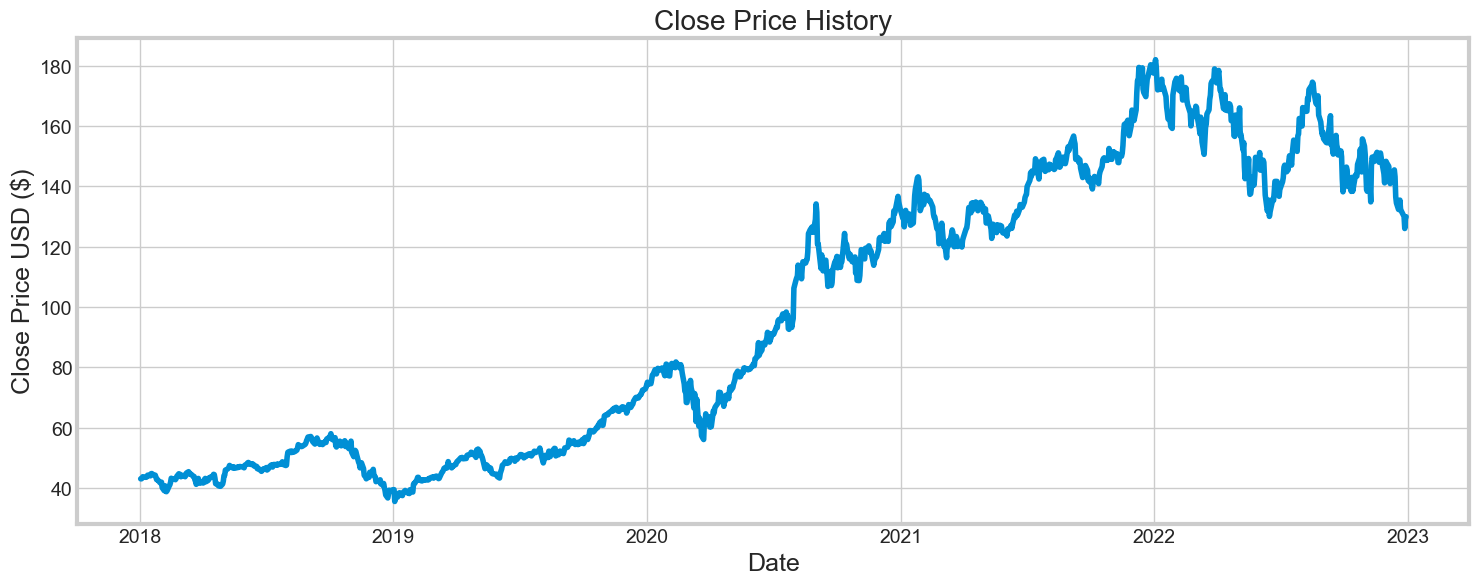

In [95]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [96]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values

In [97]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.05132712],
       [0.05127591],
       [0.05264146],
       ...,
       [0.61785443],
       [0.64222927],
       [0.64441407]])

In [98]:
# Create the training data set 
# Create the scaled training data set
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .9 ))
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape, y_train.shape

((1074, 60, 1), (1074, 1))

In [99]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1074/1074 [==============================] - 25s 22ms/step - loss: 0.0030


In [100]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 0s 15ms/step


5.187782056970926

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_74390/637757777.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


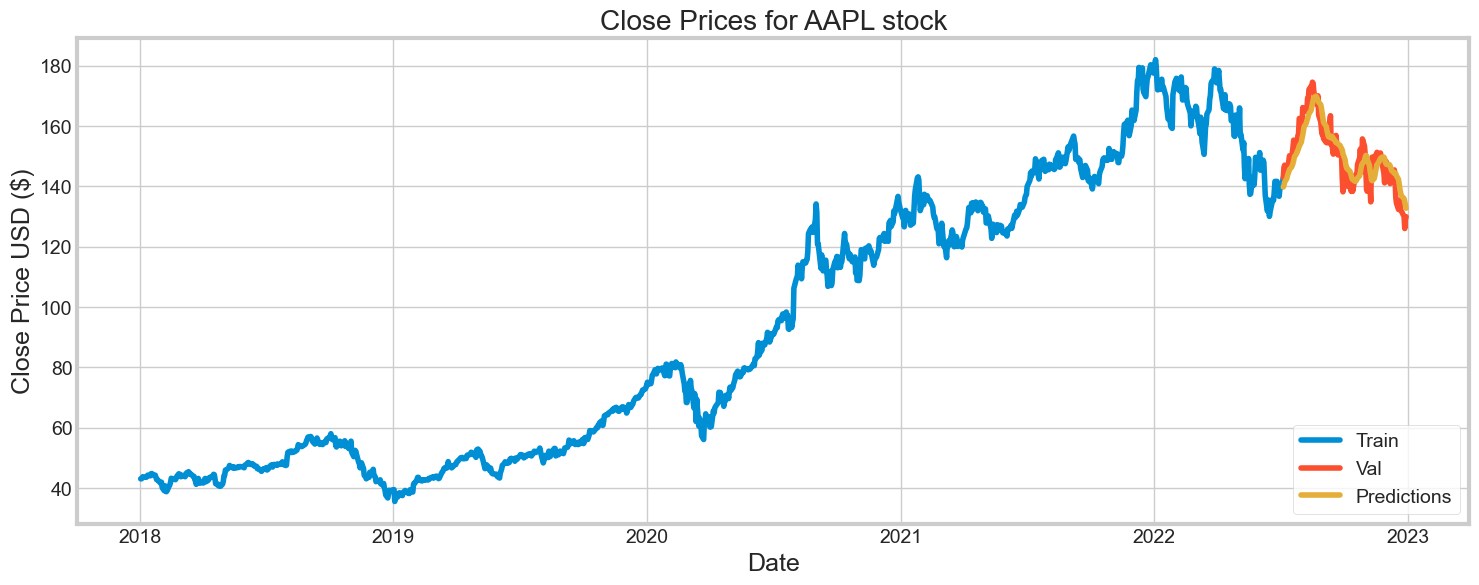

In [101]:
# Plot the data
train = data[:training_data_len+1]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Close Prices for AAPL stock')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [106]:
import plotly.graph_objects as go
import plotly.express as px

# Create traces
trace1 = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
trace2 = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Validation')
trace3 = go.Scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Predictions')

# Layout
layout = go.Layout(title='Close Prices for AAPL stock',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Close Price USD ($)'))

# Figure
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)

# Show plot
fig.show()


In [109]:
# Calculate residuals
valid['Residuals'] = valid['Close'] - valid['Predictions']

# Create a trace for residuals
trace_res = go.Scatter(x=valid.index, y=valid['Residuals'], mode='lines+markers', name='Residuals')

# Layout
layout_res = go.Layout(title='Residuals of AAPL Stock Predictions',
                       xaxis=dict(title='Date'),
                       yaxis=dict(title='Residuals'))

# Figure
fig_res = go.Figure(data=[trace_res], layout=layout_res)

# Show plot
fig_res.show()


/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_74390/720964869.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
valid['Prev Day Close'] = valid['Close'].shift(1)
valid['Control Residuals'] = valid['Close'] - valid['Prev Day Close']

# Create a trace for residuals
trace_res = go.Scatter(x=valid.index, y=valid['Residuals'], mode='lines+markers', name='Residuals')

# Layout
layout_res = go.Layout(title='Residuals of AAPL Stock Predictions',
                       xaxis=dict(title='Date'),
                       yaxis=dict(title='Residuals'))

# Figure
fig_res = go.Figure(data=[trace_res], layout=layout_res)

# Show plot
fig_res.show()

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_74390/1212904369.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_74390/1212904369.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [114]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((valid["Predictions"] - valid["Close"]) ** 2)))
rmse

5.187782056970926

In [115]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((valid["Prev Day Close"] - valid["Close"]) ** 2)))
rmse

3.3193231717410665

In [111]:
# Show the valid and predicted prices
valid

,Close,Predictions,Residuals,Prev Day Close
Date,,,,
2022-07-06,142.919998,139.777710,3.142288,NaN
2022-07-07,146.350006,140.384995,5.965012,142.919998
2022-07-08,147.039993,141.395248,5.644745,146.350006
2022-07-11,144.869995,142.576706,2.293289,147.039993
2022-07-12,145.860001,143.499344,2.360657,144.869995
...,...,...,...,...
2022-12-23,131.860001,136.908051,-5.048050,132.229996
2022-12-27,130.029999,135.955582,-5.925583,131.860001
2022-12-28,126.040001,134.986572,-8.946571,130.029999
